In [1]:
from sympy import *
from sympy.vector import Vector
from sympy.vector import CoordSys3D
from sympy.abc import x
N = CoordSys3D('N')

t = symbols( 't', real=True, positive=True )
m, n, d, k, l = symbols( 'm n d k l', positive=True, integer=True )
a, b = symbols( 'a b', positive=True, integer=True )
init_printing(use_unicode=True)

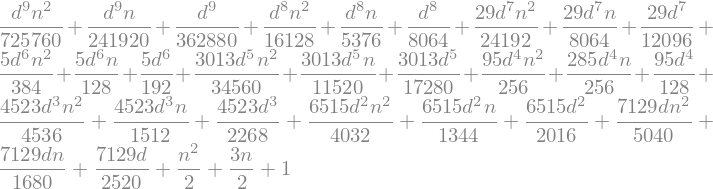

In [2]:
simplify( binomial(n+2,n).expand(func=True) * binomial(d+9,d) ).expand(func=True)

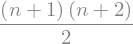

In [9]:
factor(binomial(n+2,n).expand(func=True))

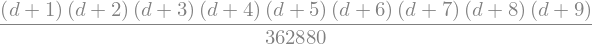

In [10]:
factor(binomial(d+9,d).expand(func=True))

In [18]:
latex( factor((n + 2*k + 1)*(m + 2*l + 1)) )

'\\left(2 k + n + 1\\right) \\left(2 l + m + 1\\right)'

In [17]:
latex(factor( Sum( (n + 2*k + 1)*(m + 2*l + 1), (l, 0, d-k)).doit() ))

'\\left(d - k + 1\\right) \\left(2 k + n + 1\\right) \\left(d - k + m + 1\\right)'

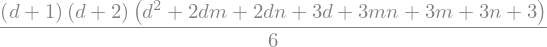

In [12]:
factor( Sum( (d - k + 1)*(2*k + n + 1)*(d - k + m + 1), (k,0,d) ).doit()  )

In [5]:
v = Partitions(2, length=2).list(); v

[[1, 1]]

In [8]:
v = Partitions(3).list(); v

[[3], [2, 1], [1, 1, 1]]

In [13]:
Partitions(3, starting=[2,0]).first()

[2]

In [21]:
a = 2
b = 1
VP = VectorPartitions([a, a+b])
for vecpar in VP:
    print (vecpar)

[[0, 1], [0, 1], [0, 1], [1, 0], [1, 0]]
[[0, 1], [0, 1], [0, 1], [2, 0]]
[[0, 1], [0, 1], [1, 0], [1, 1]]
[[0, 1], [0, 1], [2, 1]]
[[0, 1], [0, 2], [1, 0], [1, 0]]
[[0, 1], [0, 2], [2, 0]]
[[0, 1], [1, 0], [1, 2]]
[[0, 1], [1, 1], [1, 1]]
[[0, 1], [2, 2]]
[[0, 2], [1, 0], [1, 1]]
[[0, 2], [2, 1]]
[[0, 3], [1, 0], [1, 0]]
[[0, 3], [2, 0]]
[[1, 0], [1, 3]]
[[1, 1], [1, 2]]
[[2, 3]]


In [22]:
VP.cardinality()

16

In [18]:
a

In [23]:
N = CoordSys3D('N')

t = symbols( 't')
k = symbols('k', real = True)
p, q = symbols('p q', integer=True)
a, b, d = symbols('a b d', positive=True, integer=True)
# init_printing(use_unicode=True)
init_printing(use_latex='mathjax')

# Basis for the edge/weight vectors for the points 

v1 = N.i
v2 = N.j

# Define the vector which is not parallel to any edge vector, which will tend to zero:

Phi = t*(v1)

# Define the vertices of the general triangle:

def P1(a,b):
    return 0*v1

def P2(a,b):
    return a*v1

def P3(a,b):
    return (a + b)*v1

def P3_3(a,b,d):
    return (a + b + d)*v1

def P1_1(d):
    return -(b + 2*d)*v1

# Define the term which is summed over each fixed point,
# representing the character for the representation

# def P(P, edge1, edge2, edge3, edge4):
#    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) * ( 1 - exp( Phi.dot(edge3) ) ) * ( 1 - exp( Phi.dot(edge4) ) ) )

def Q(P, edge1, edge2):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) )

def Exp(p, q):
    return exp( 2*pi*I*Rational(p,q) )

# Term for the orbifold points:

#def UnityRootTerm(P, p, q, edge1, edge2):
#    return ( Rational(1,q) * exp( Phi.dot(P) / q ) ) / ( (1 - ( Exp(p,q) * exp(  Phi.dot(edge1) ) ) ) * ( 1 - ( Exp(p,q) * exp( Rational(1,q) * Phi.dot(edge2) ) ) ) )

def UnityRootTerm(P, p, q, edge1, edge2):
    return ( exp( Phi.dot(P) / q ) ) / ( (1 - ( (Exp(p,q) * exp( Rational(1,q) * Phi.dot(edge1) ) ) ) * ( 1 - ( Exp(p,q) * exp( Rational(1,q) * Phi.dot(edge2) ) ) ) ) )

# Iterates the sum over each q-th root of unity:

def OrbiCharacter(P, q, edge1, edge2):
    return sum([UnityRootTerm(P, k, q, edge1, edge2) for k in range(0,q)])

def Exp(p, q):
    return exp( 2*pi*I*Rational(p,q) )

# For P3_3, which has orbifold structure group of order 2:

def Sum_P3_3(a,b,d):
    return Rational(1,2) * ( exp( Phi.dot(P3_3(a,b,d)) ) / ( ( (1 - Exp(0,2) * exp( Phi.dot( ( -v1 )*Rational(1,2) ) ) ) ) * ( 1 - Exp(0,2) * exp( Phi.dot( ( -v1 )*Rational(1,2) ) ) ) ) + ( exp( Phi.dot(P3_3(a,b,d)) ) ) / ( ( (1 - Exp(1,2) * exp( Phi.dot( ( -v1 )*Rational(1,2) ) ) ) ) * ( 1 - Exp(1,2) * exp( Phi.dot( ( -v1 )*Rational(1,2) ) ) ) ) )  

# For P1_1, which is smooth:

def Sum_P1_1(d):
    return exp( Phi.dot( P1_1(d) ) ) / ( ( 1 - exp( Phi.dot( v1 ) ) ) * ( 1 - exp( Phi.dot( v1 ) ) ) )

# For P1, which is smooth:

def Sum_P1(a,b):
    return exp( Phi.dot( P1(a,b) ) ) / ( ( 1 - exp( Phi.dot( v1 ) ) ) * ( 1 - exp( Phi.dot( -v1 ) ) ) )

# For P2, which is smooth:

def Sum_P2(a,b):
    return exp( Phi.dot( P2(a,b) ) ) / ( ( 1 - exp( Phi.dot( v1 ) ) ) * ( 1 - exp( Phi.dot( -v1 ) ) ) )

# For P3, which is smooth:

def Sum_P3(a,b):
    return exp( Phi.dot( P3(a,b) ) ) / ( ( 1 - exp( Phi.dot( v1 ) ) ) * ( 1 - exp( Phi.dot( -v1 ) ) ) )

def Sum(a,b,d):
    return Sum_P1(a,b) + Sum_P2(a,b) + Sum_P3(a,b) + Sum_P1_1(d) + Sum_P3_3(a,b,d)

Sum(a,b,d)

exp(t*(-b - 2*d))/(1 - exp(t))**2 + exp(t*(a + b + d))/(2*(1 + exp(-t/2))**2) + exp(t*(a + b + d))/(2*(1 - exp(-t/2))**2) + exp(a*t)/((1 - exp(-t))*(1 - exp(t))) + exp(t*(a + b))/((1 - exp(-t))*(1 - exp(t))) + 1/((1 - exp(-t))*(1 - exp(t)))

In [24]:
factor( limit(Sum(a,b,d), t, 0) )

a*b + 2*a*d + a + b**2 + 4*b*d + 2*b + 3*d**2 + 3*d + 1

In [25]:
def Euler(a,b,d):
    return factor(a*b + 2*a*d + a + b**2 + 4*b*d + 2*b + 3*d**2 + 3*d + 1)

Euler(a,b,d)

a*b + 2*a*d + a + b**2 + 4*b*d + 2*b + 3*d**2 + 3*d + 1

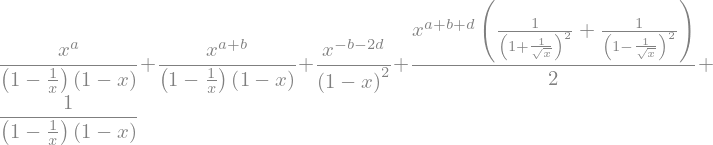

In [50]:
def GenFct(a,b,d):
    return ( 1 / ( (1-x) * (1-x**(-1)) ) ) + ( x**a / ( (1-x) * (1-x**(-1)) ) ) + ( x**(a+b) / ( (1-x) * (1-x**(-1)) ) ) + ( x**(-b-2*d) / ( (1-x)**2 ) ) + ( (x**(a+b+d)/2) ) * ( 1 / ( (1-x**(-1/2))**2 ) + 1 / ( (1+x**(-1/2))**2 ) )

GenFct(a,b,d)

In [ ]:
series(GenFct(a,b,d), x, 0, "+")

In [59]:
series(( 1 / ( (1-x**(-1/2))**2 ) + 1 / ( (1+x**(-1/2))**2 ) )/2, x)

In [2]:
A = Matrix([[1,1],[0,1],[-1,1],[0,-1]])

In [3]:
kernel(A)

Free module of degree 4 and rank 2 over Integer Ring
Echelon basis matrix:
[1 0 1 2]
[0 1 0 1]